This dataset is adapted from the [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine) by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the **three** types of wines.

Try to create clusters and see if they are coherent with the three types of wine

**Attributes:**

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

source : [Kaggle](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Use K-mean to cluster wine

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

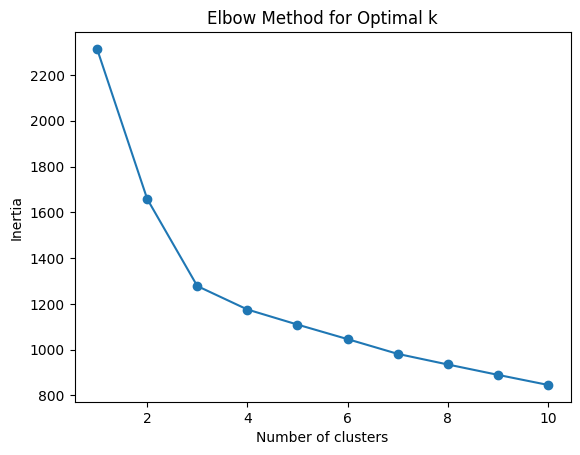

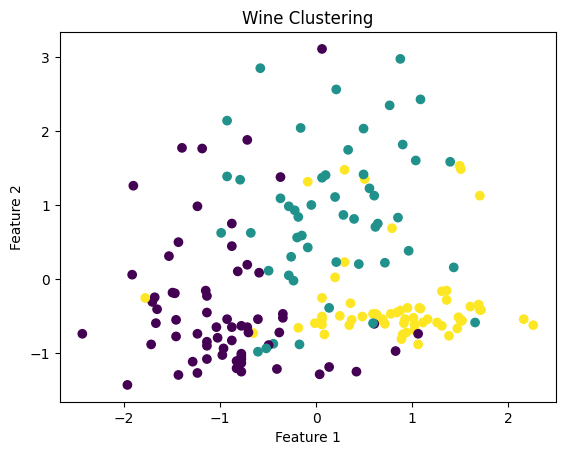

Silhouette Score: 0.2848589191898987
   Cluster    Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
0        0  12.250923    1.897385  2.231231     20.063077   92.738462   
1        1  13.134118    3.307255  2.417647     21.241176   98.666667   
2        2  13.676774    1.997903  2.466290     17.462903  107.967742   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0       2.247692    2.050000              0.357692         1.624154   
1       1.683922    0.818824              0.451961         1.145882   
2       2.847581    3.003226              0.292097         1.922097   

   Color_Intensity       Hue     OD280      Proline  
0         2.973077  1.062708  2.803385   510.169231  
1         7.234706  0.691961  1.696667   619.058824  
2         5.453548  1.065484  3.163387  1100.225806  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load the wine dataset
data_path = 'data.csv'
wine_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(wine_data.head())

# Select relevant features for clustering
selected_features = wine_data.columns
X = wine_data[selected_features]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Find the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, let's choose the optimal number of clusters (k)
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
# Note: Modify this based on the number of features in your dataset
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=wine_data['Cluster'], cmap='viridis')
plt.title('Wine Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print silhouette score for the clustering
silhouette_avg = silhouette_score(X_scaled, wine_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Analyze the characteristics of each cluster
cluster_summary = wine_data.groupby('Cluster').mean().reset_index()
print(cluster_summary)


## Other algorithms

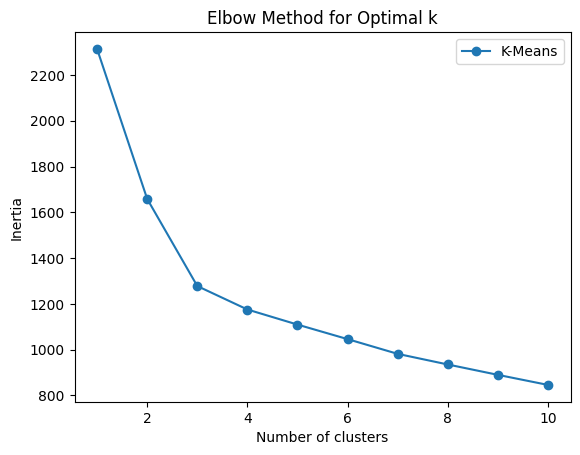

Silhouette Score (K-Means): 0.2848589191898987
Silhouette Score (Agglomerative): 0.2774439826952265
DBSCAN clustering does not have enough unique labels for silhouette score.
Silhouette Score (Birch): 0.2774439826952265
Silhouette Score (GMM): 0.2848589191898987


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load the wine dataset
data_path = 'data.csv'
wine_data = pd.read_csv(data_path)

# Select relevant features for clustering
selected_features = wine_data.columns
X = wine_data[selected_features]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Find the optimal number of clusters using the Elbow Method for K-Means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph for K-Means
plt.plot(range(1, 11), inertia, marker='o', label='K-Means')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Based on the Elbow Method, let's choose the optimal number of clusters (k) for K-Means
optimal_k_kmeans = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k_kmeans, init='k-means++', max_iter=300, n_init=10, random_state=42)
wine_data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Evaluate K-Means clustering
silhouette_avg_kmeans = silhouette_score(X_scaled, wine_data['Cluster_KMeans'])
print(f"Silhouette Score (K-Means): {silhouette_avg_kmeans}")

# Apply Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
wine_data['Cluster_Agglomerative'] = agg_cluster.fit_predict(X_scaled)

# Evaluate Agglomerative Hierarchical Clustering
silhouette_avg_agg = silhouette_score(X_scaled, wine_data['Cluster_Agglomerative'])
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg}")

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_data['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Evaluate DBSCAN clustering if there are more than one unique label
unique_labels_dbscan = np.unique(wine_data['Cluster_DBSCAN'])
if len(unique_labels_dbscan) > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled, wine_data['Cluster_DBSCAN'])
    print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
else:
    print("DBSCAN clustering does not have enough unique labels for silhouette score.")

# Apply Birch clustering
birch = Birch(n_clusters=3)
wine_data['Cluster_Birch'] = birch.fit_predict(X_scaled)

# Evaluate Birch clustering
silhouette_avg_birch = silhouette_score(X_scaled, wine_data['Cluster_Birch'])
print(f"Silhouette Score (Birch): {silhouette_avg_birch}")

# Apply Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
wine_data['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# Evaluate Gaussian Mixture Models if there are more than one unique label
unique_labels_gmm = np.unique(wine_data['Cluster_GMM'])
if len(unique_labels_gmm) > 1:
    silhouette_avg_gmm = silhouette_score(X_scaled, wine_data['Cluster_GMM'])
    print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")
else:
    print("GMM clustering does not have enough unique labels for silhouette score.")
